#### Graphs and Digital Humanities

Let's try to create a network of interaction between different characters, using automatic name extraction and the module for  graph creation.

In [ ]:
!pip install natasha

In [ ]:
from natasha.extractors import NamesExtractor
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
FILE = 'pin.txt'
with open(FILE, encoding='utf-8') as f:
    corpus = f.read()

The library natasha is used to extract names, locations etc. Let's try to extract names.

In [5]:
ne = NamesExtractor()

In [6]:
ne('В Москве установили памятник Александру Сергеевичу Пушкину')

Matches('В Москве установили памятник Александру Сергеевичу Пушкину',
        [Match([MorphTagToken('Александру',
                              [29, 39),
                              'RU',
                              'I',
                              [Form('александр',
                                    Grams(NOUN,Name,anim,datv,masc,sing))]),
                MorphTagToken('Сергеевичу',
                              [40, 50),
                              'RU',
                              'I',
                              [Form('сергей',
                                    Grams(NOUN,Patr,anim,datv,masc,sing))]),
                MorphTagToken('Пушкину',
                              [51, 58),
                              'RU',
                              'I',
                              [Form('пушкин',
                                    Grams(Geox,NOUN,datv,inan,masc,sing)),
                               Form('пушкин',
                                    Grams(NOUN,Sgtm,Surn,anim,datv,masc,sing))])],
               [29, 58))])

In [ ]:
%%time
res = ne(corpus)

This is what one name looks like:

In [59]:
res[0]

Match([MorphTagToken('Раскольникова',
                     [9750, 9763),
                     'RU',
                     'I',
                     [Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,anim,gent,masc,sing)),
                      Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,accs,anim,masc,sing)),
                      Form('раскольников',
                           Grams(NOUN,Sgtm,Surn,anim,femn,nomn,sing))])],
      [9750, 9763))

Let's see what the result is for our book. We get first name, surname and patronymics (.fact.middle) separately.

In [64]:
seen = defaultdict(int)
for idx, name in enumerate(res[1:]):
    curr = name
    value = f'{curr.fact.first or ""} {curr.fact.middle or ""} {curr.fact.last or ""}'.strip()
    seen[value] += 1

for key in sorted(seen, key=seen.get, reverse=True):
    if seen[key] > 5:
        print(key)

разумихин
соня
катерина ивановна
свидригайлов
раскольников
пётр  петрович
дуня
пульхерия александровна
авдотья романовна
порфирий
порфирий  петрович
марфа  петровна
софья  семёновна
настасья
амалия ивановна
зосим
родион  романыч
родя
лизавета
родион романович
андрей  семёнович
заметов
илья  петрович
раскольник
зосимов
николай
дмитрий прокофьич
никодим фомич
кох
дун
лебезятников
полечка
алёна ивановна
митька
аркадий иванович
иисус
сонечка
капернаумов
бакалеев
миколай
лазарь
шиллер
чебаров
прасковья павловна
излера
поленька
амалия людвиговна
родион
лёня


We can bring different variants of names to one variant by creating a mapping:

In [46]:
name_mapping = {
    'александр григориевич':'Александр Григорьевич Заметов',
    'заметов':'Александр Григорьевич Заметов',
    'амаль':'Амалия Людвиговна',
    'людвиговна':'Амалия Людвиговна',
    'амалия людвиговна':'Амалия Людвиговна',
    'андрей  семёнович':'Андрей Семенович Лебезятников',
    'андрей семёныч лебезятников':'Андрей Семёныч Лебезятников',
    'лебезятников':'Андрей Семёныч Лебезятников',
    'афанасий':'Афанасий Иванович Вахрушин',
    'иванович  вахрушин':'Афанасий Иванович Вахрушин',
    'зарницын':'вдова Зарницына',
    'разумихин':'Дмитрий Прокофьевич Разумихин',
    'дмитрий':'Дмитрий Прокофьевич Разумихин',
    'дмитрий прокофьич':'Дмитрий Прокофьевич Разумихин',
    'дуня':'Дуня Раскольникова',
    'авдотья романовна':'Дуня Раскольникова',
    'дун':'Дуня Раскольникова',
    'зосим':'Зосимов',
    'зосимов':'Зосимов',
    'илья  петрович':'Илья Петрович Порох',
    'капернаумов':'Капернаумов',
    'катерина ивановна':'Катерина Ивановна',
    'кох':'Кох',
    'лидочка':'Лидочка Мармеладова',
    'лизавета':'ЛизавеИвановна',
    'лизавета ивановна':'ЛизавеИвановна',
    'мармеладовая':'Мармеладова (?)',
    'марфа  петровна':'Марфа Петровна Свидригайлова',
    'марфа':'Марфа Петровна Свидригайлова',
    'николай':'Миколка',
    'коля':'Миколка',
    'настасья':'Настасья',
    'пестряков':'Пестряков',
    'пётр  петрович':'Пётр Петрович Лужин',
    'лужин':'Пётр Петрович Лужин',
    'полечка':'Полечка Мармеладова',
    'порфирий  петрович':'Порфирий Петрович',
    'порфирий':'Порфирий Петрович',
    'пульхерия александровна':'Пульхерия Александровна',
    'раскольников':'Раскольников',
    'раскольник':'Раскольников',
    'родион  романыч':'Раскольников',
    'родион':'Раскольников',
    'родя':'Раскольников',
    'свидригайлов':'Свидригайлов',
    'сонечка':'Соня Мармеладова',
    'соня':'Соня Мармеладова',
    'софья  семёновна':'Соня Мармеладова',
    'алёна ивановна':'старуха-процентщица'
}

Now let's create a dictionary of pairwise co-occurrence:

In [75]:
max_dist = 100
all_pairs = defaultdict(int)

for idx, name in enumerate(res[1:]):
    prev = res[idx-1]
    curr = name
    end = curr.span[1]
    start = prev.span[0]
    value1 = f'{prev.fact.first or ""} {prev.fact.middle or ""} {prev.fact.last or ""}'.strip()
    value2 = f'{curr.fact.first or ""} {curr.fact.middle or ""} {curr.fact.last or ""}'.strip()
    if value1 in name_mapping and value2 in name_mapping:
        value1 = name_mapping.get(value1) or value1
        value2 = name_mapping.get(value2) or value2
        if end - start <= max_dist:
            if value1 > value2:
                pair = (value2, value1)
            else:
                pair = (value1, value2)
            if pair[0] != pair[1]:
                all_pairs[pair] += 1

To normalize the weight, let's determine the maximal count

In [53]:
max_cnt = max(all_pairs[i] for i in all_pairs)

Let's add the edges to the graph:

In [54]:
G = nx.Graph()
for pair in all_pairs:
    n1, n2 = pair
    w = all_pairs[pair] / max_cnt
    G.add_edge(n1, n2, weight=w)

Let's create two types of edges (based on their importance):

In [55]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

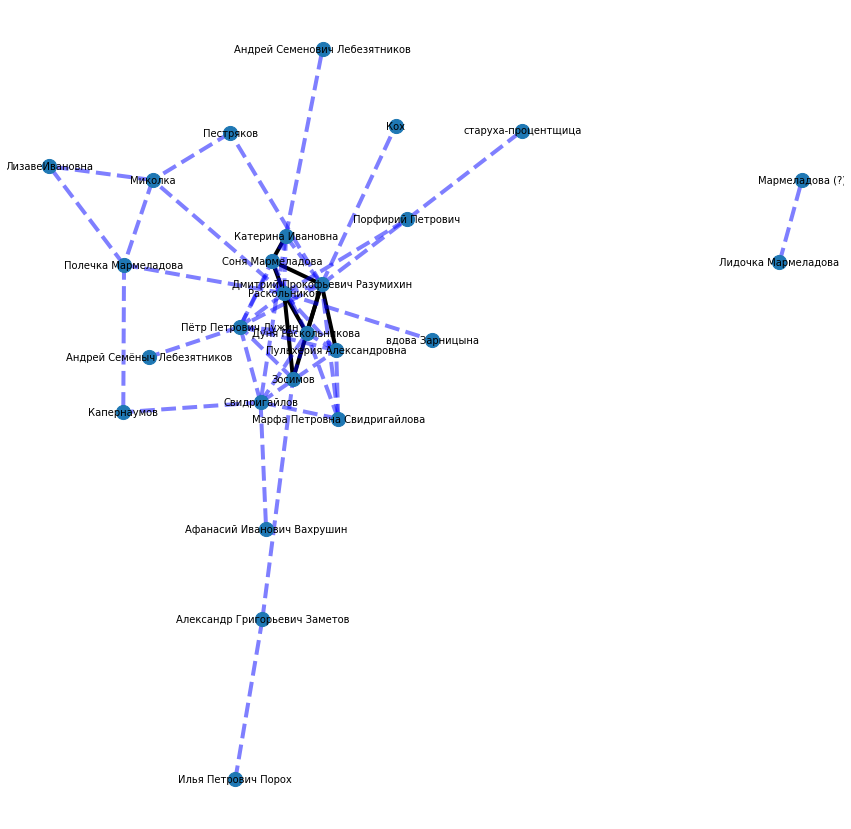

In [56]:
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))

# drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=200)
# drawing popular edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
# drawing less popular edges
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='b', style='dashed')
# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [57]:
print('\n'.join(G.nodes))

Катерина Ивановна
Раскольников
Марфа Петровна Свидригайлова
Свидригайлов
Афанасий Иванович Вахрушин
Александр Григорьевич Заметов
Илья Петрович Порох
Зосимов
Дмитрий Прокофьевич Разумихин
Пестряков
Кох
Миколка
Пётр Петрович Лужин
Лидочка Мармеладова
Мармеладова (?)
Полечка Мармеладова
Пульхерия Александровна
Дуня Раскольникова
Соня Мармеладова
Порфирий Петрович
ЛизавеИвановна
старуха-процентщица
Андрей Семёныч Лебезятников
Андрей Семенович Лебезятников
Капернаумов
вдова Зарницына


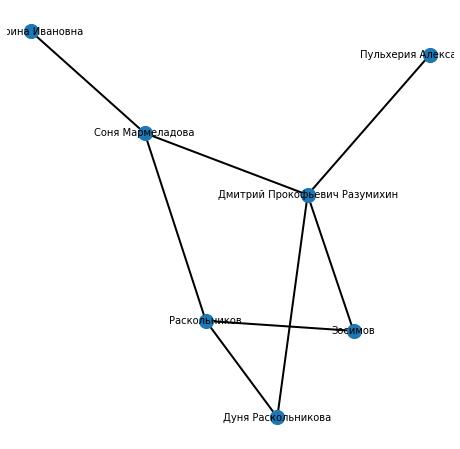

In [58]:
G2 = G.edge_subgraph(elarge)
pos = nx.spring_layout(G2)
plt.figure(figsize=(8, 8))

# drawing nodes
nx.draw_networkx_nodes(G2, pos, node_size=200)

# drawing popular edges
nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=2)


# labels
nx.draw_networkx_labels(G2, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

We can also draw a dispersion plot for different characters:

In [67]:
from nltk.text import Text
from nltk.tokenize import wordpunct_tokenize
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

In [71]:
text = [morph.parse(w)[0].normal_form for w in wordpunct_tokenize(corpus)]

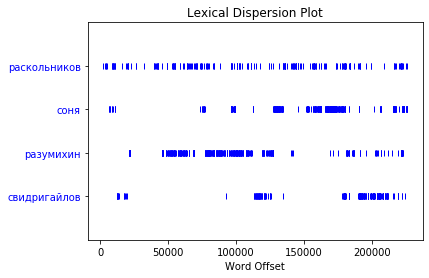

In [72]:
text = Text(text)
text.dispersion_plot(['раскольников', 'соня', 'разумихин', 'свидригайлов'])

Rusdracor [https://dracor.org/](https://dracor.org/), where you can find graphs for novels.